In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import warnings
warnings.simplefilter("ignore")

In [2]:
# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [3]:
# Define the model with varying hidden layers
def create_model(hidden_layers):
    model = Sequential()
    
    # Input layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
    model.add(MaxPooling2D((2, 2)))

    # Add hidden layers
    for units in hidden_layers:
        model.add(Conv2D(units, (3, 3), activation='relu', padding='same'))
        model.add(MaxPooling2D((2, 2)))

    # Flatten and add dense layers
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))  # Output layer with 10 classes

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [4]:
# Vary the number of hidden layers
hidden_layers_options = [[64], [64,128], [64, 128,256], [64, 128, 256,512]]
accuracy=[]

for hidden_layers in hidden_layers_options:
    model = create_model(hidden_layers)
    
    # Train the model
    history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)
    
    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    test_acc = round(test_acc*100,2)
    print('Test accuracy: ',test_acc)
    accuracy.append(test_acc)

Epoch 1/10
625/625 [==============================] - 21s 33ms/step - loss: 1.5356 - accuracy: 0.4451 - val_loss: 1.2675 - val_accuracy: 0.5505
Epoch 2/10
625/625 [==============================] - 21s 33ms/step - loss: 1.1509 - accuracy: 0.5924 - val_loss: 1.1228 - val_accuracy: 0.6005
Epoch 3/10
625/625 [==============================] - 21s 33ms/step - loss: 1.0056 - accuracy: 0.6491 - val_loss: 1.0202 - val_accuracy: 0.6466
Epoch 4/10
625/625 [==============================] - 21s 33ms/step - loss: 0.9062 - accuracy: 0.6851 - val_loss: 1.0251 - val_accuracy: 0.6483
Epoch 5/10
625/625 [==============================] - 22s 36ms/step - loss: 0.8359 - accuracy: 0.7114 - val_loss: 0.9473 - val_accuracy: 0.6763
Epoch 6/10
625/625 [==============================] - 23s 37ms/step - loss: 0.7751 - accuracy: 0.7308 - val_loss: 0.9165 - val_accuracy: 0.6910
Epoch 7/10
625/625 [==============================] - 21s 33ms/step - loss: 0.7283 - accuracy: 0.7461 - val_loss: 0.9011 - val_accuracy:

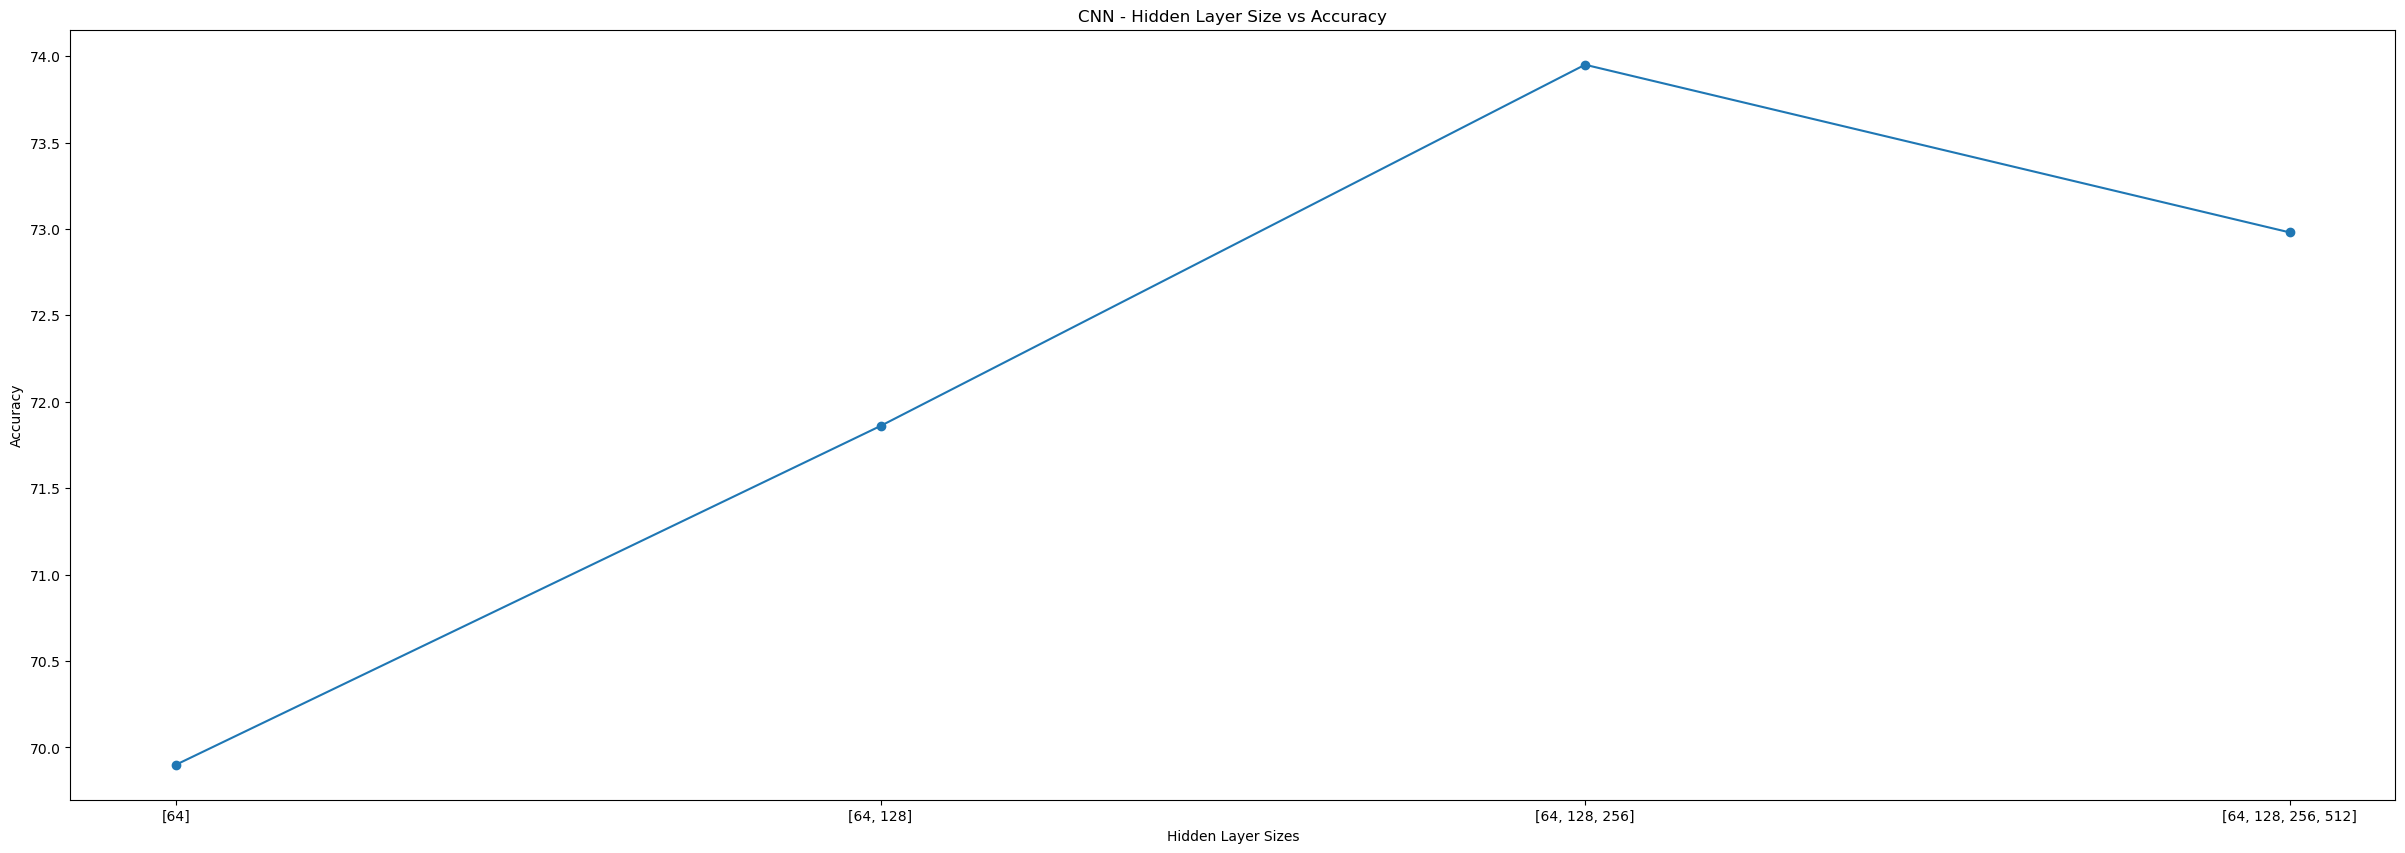

In [5]:
dataset={'Hidden Layer':hidden_layers_options,'Accuracy':accuracy}
df = pd.DataFrame(dataset)

fig=plt.figure(figsize=(30,10))
plt.plot(df['Hidden Layer'].astype('string'),df['Accuracy'],marker='o')
plt.title('CNN - Hidden Layer Size vs Accuracy')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Accuracy')
plt.savefig('CNN_DiffLayer')
plt.show()

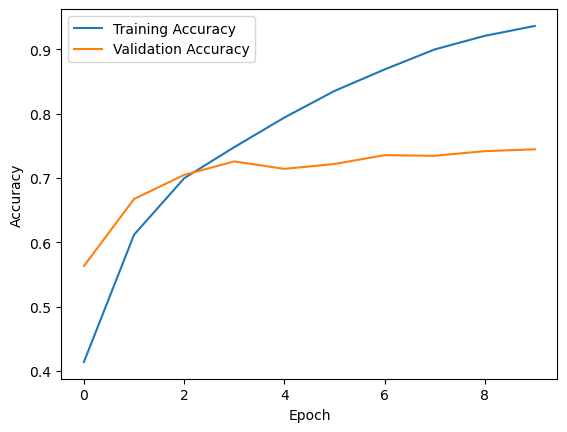

In [6]:
# Plot the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('CNN_Training')
plt.show()

In [7]:
# Vary the number of hidden layers
hidden_layers_options2 = [[64,64], [64,128], [64,256], [64,512]]
accuracy=[]

for hidden_layers in hidden_layers_options2:
    model = create_model(hidden_layers)
    
    # Train the model
    history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)
    
    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    test_acc = round(test_acc*100,2)
    print('Test accuracy: ',test_acc)
    accuracy.append(test_acc)

Epoch 1/10
625/625 [==============================] - 24s 37ms/step - loss: 1.5978 - accuracy: 0.4223 - val_loss: 1.3071 - val_accuracy: 0.5362
Epoch 2/10
625/625 [==============================] - 23s 37ms/step - loss: 1.1871 - accuracy: 0.5763 - val_loss: 1.0919 - val_accuracy: 0.6152
Epoch 3/10
625/625 [==============================] - 23s 37ms/step - loss: 1.0084 - accuracy: 0.6435 - val_loss: 0.9832 - val_accuracy: 0.6589
Epoch 4/10
625/625 [==============================] - 23s 37ms/step - loss: 0.9006 - accuracy: 0.6857 - val_loss: 0.9256 - val_accuracy: 0.6762
Epoch 5/10
625/625 [==============================] - 23s 36ms/step - loss: 0.8162 - accuracy: 0.7158 - val_loss: 0.9162 - val_accuracy: 0.6864
Epoch 6/10
625/625 [==============================] - 23s 36ms/step - loss: 0.7525 - accuracy: 0.7352 - val_loss: 0.8497 - val_accuracy: 0.7102
Epoch 7/10
625/625 [==============================] - 23s 37ms/step - loss: 0.6983 - accuracy: 0.7546 - val_loss: 0.8057 - val_accuracy:

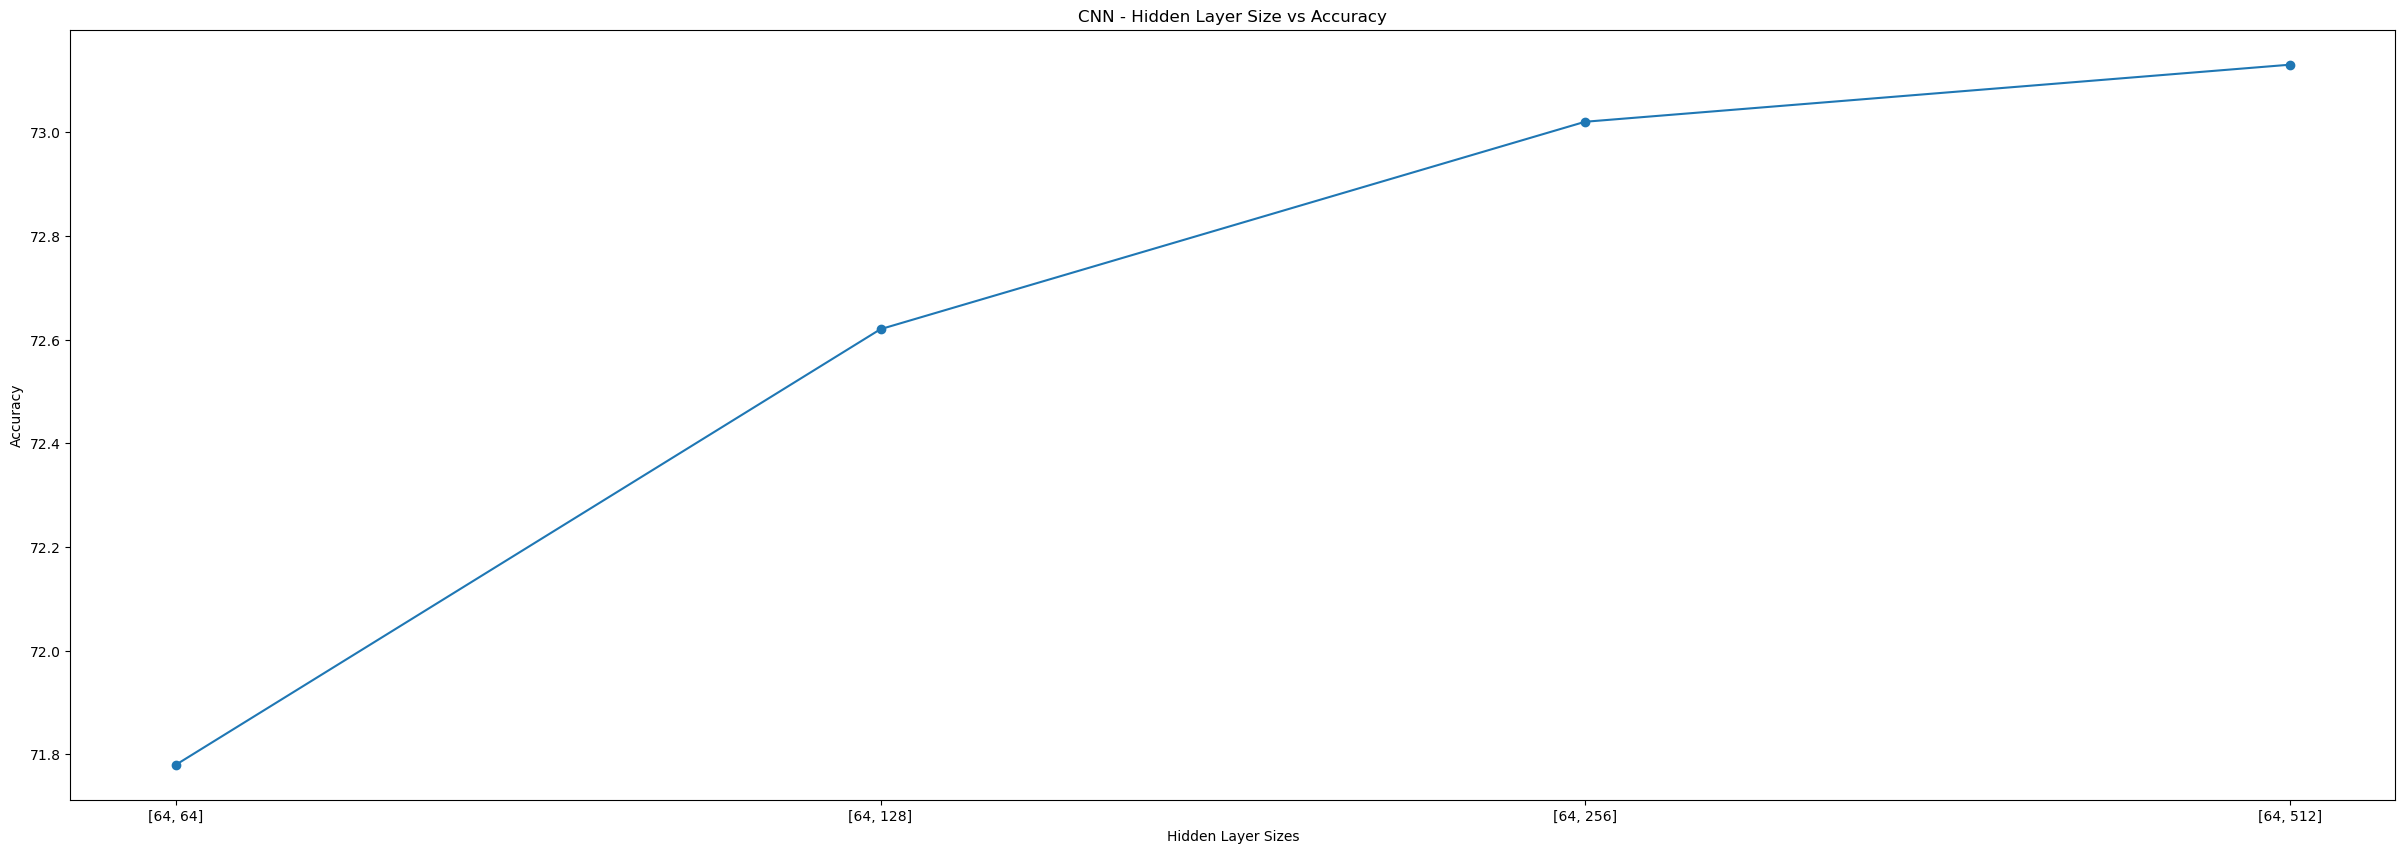

In [8]:
dataset2={'Hidden Layer':hidden_layers_options2,'Accuracy':accuracy}
df2 = pd.DataFrame(dataset2)

fig=plt.figure(figsize=(30,10))
plt.plot(df2['Hidden Layer'].astype('string'),df2['Accuracy'],marker='o')
plt.title('CNN - Hidden Layer Size vs Accuracy')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Accuracy')
plt.savefig('CNN_TwoLayer')
plt.show()